In [32]:
library(clusterProfiler)
library(dplyr)
library(msigdbr)
setwd("/data")
library(org.Mm.eg.db)
library(ggplot2)

In [14]:
m_df_hallmark <- msigdbr(species = "Mus musculus", category="H") %>% dplyr::select(gs_name, gene_symbol)
m_df_curated <- msigdbr(species = "Mus musculus", category="C2") %>% dplyr::select(gs_name, gene_symbol)

In [20]:
files <- sub(".csv$","",  list.files("csv/de/", full.names=FALSE))

[1] "epithelial.cd40vsctrl"   "epithelial.combovscd40" 
 [3] "epithelial.combovsctrl"  "epithelial.combovstak"  
 [5] "epithelial.takvscd40"    "epithelial.takvsctrl"   
 [7] "macrophages.cd40vsctrl"  "macrophages.combovscd40"
 [9] "macrophages.combovsctrl" "macrophages.combovstak" 
[11] "macrophages.takvscd40"   "macrophages.takvsctrl"  
[13] "tcells.cd40vsctrl"       "tcells.combovscd40"     
[15] "tcells.combovsctrl"      "tcells.combovstak"      
[17] "tcells.takvscd40"        "tcells.takvsctrl"

In [36]:
for (n in files){
    df <- read.csv(paste0("csv/de/", n, ".csv"))
    original_gene_list <- df$logFC
    names(original_gene_list) <- df$X
    gene_list<-na.omit(original_gene_list)
    gene_list = sort(gene_list, decreasing = TRUE)
    gse_GO <- gseGO(geneList=gene_list, 
                ont ="ALL",
                keyType="SYMBOL",
                minGSSize = 10, 
                maxGSSize = 800,
                pvalueCutoff = 0.05,
                verbose = TRUE,
                OrgDb =org.Mm.eg.db)
    write.csv(gse_GO[], paste0("csv/gsea/", n, "_GO.csv"))
    ridgeplot(gse_GO, showCategory = 20)
    ggsave(paste0("figs/gsea/", n, "_GO.png"), height=12, width=8)
    gse_h<-GSEA(gene_list,
                TERM2GENE=m_df_hallmark,
                minGSSize=10)
    write.csv(gse_h[], paste0("csv/gsea/", n, "_hallmark.csv"))
    ridgeplot(gse_h, showCategory = 20)
    ggsave(paste0("figs/gsea/", n, "_hallmark.png"), height=12, width=8)
    gse_curated<-GSEA(gene_list,
            TERM2GENE=m_df_curated,
            minGSSize=10)
    write.csv(gse_curated[], paste0("csv/gsea/", n, "_currated.csv"))
    ridgeplot(gse_curated, showCategory = 20)
    ggsave(paste0("figs/gsea/", n, "_gse_curated.png"), height=12, width=8)   
}

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 19 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

Picking joint bandwidth of 0.202

preparing geneSet collections...

GSEA analysis...

Warning message

In [46]:
gs<-c("HALLMARK-INTERFERON-ALPHA-RESPONSE",
"HALLMARK-INTERFERON-GAMMA-RESPONSE",
"REACTOME-INTERFERON-ALPHA-BETA-SIGNALING",
"REACTOME-INTERFERON-SIGNALING",
"REACTOME-INTERFERON-GAMMA-SIGNALING",
"HALLMARK-INFLAMMATORY-RESPONSE",
"WP-MACROPHAGE-MARKERS",
"REACTOME-SUMOYLATION",
"GOBP-REGULATION-OF-MACROPHAGE-ACTIVATION",
"GOBP-MACROPHAGE-PROLIFERATION",
"REACTOME-SUMOYLATION-OF-INTRACELLULAR-RECEPTORS",
"REACTOME-SUMOYLATION-OF-IMMUNE-RESPONSE-PROTEINS",
"GOBP-REGULATION-OF-MACROPHAGE-PROLIFERATION",
"BIOCARTA-IFNA-PATHWAY",
"GOBP-NEGATIVE-REGULATION-OF-PROTEIN-SUMOYLATION",
"REACTOME-REGULATION-OF-IFNG-SIGNALING",
"GOBP-MACROPHAGE-CYTOKINE-PRODUCTION",
"GOBP-REGULATION-OF-MACROPHAGE-APOPTOTIC-PROCESS",
"GOBP-MACROPHAGE-ACTIVATION-INVOLVED-IN-IMMUNE-RESPONSE",
"GOBP-POSITIVE-REGULATION-OF-PROTEIN-SUMOYLATION",
"BIOCARTA-STAT3-PATHWAY",
"REACTOME-FCGAMMA-RECEPTOR-FCGR-DEPENDENT-PHAGOCYTOSIS",
"BIOCARTA-CD40-PATHWAY",
"GOBP-REGULATION-OF-MACROPHAGE-CHEMOTAXIS",
"REACTOME-NITRIC-OXIDE-STIMULATES-GUANYLATE-CYCLASE",
"REACTOME-NF-KB-IS-ACTIVATED-AND-SIGNALS-SURVIVAL",
"BIOCARTA-IFNG-PATHWAY",
"GOBP-MACROPHAGE-CHEMOTAXIS",
"HALLMARK-TNFA-SIGNALING-VIA-NFKB",
"BIOCARTA-MONOCYTE-PATHWAY",
"REACTOME-METABOLISM-OF-NITRIC-OXIDE-NOS3-ACTIVATION-AND-REGULATION",
"BIOCARTA-NFKB-PATHWAY",
"REACTOME-PROCESSING-AND-ACTIVATION-OF-SUMO")
gs<- gsub("-", "_", gs)

In [47]:
select_df <-  msigdbr(species = "Mus musculus")  %>% dplyr::select(gs_name, gene_symbol) %>% subset(gs_name %in% gs)

In [ ]:
files <- sub(".csv$","",  list.files("csv/de/", full.names=FALSE))

Picking joint bandwidth of 0.201



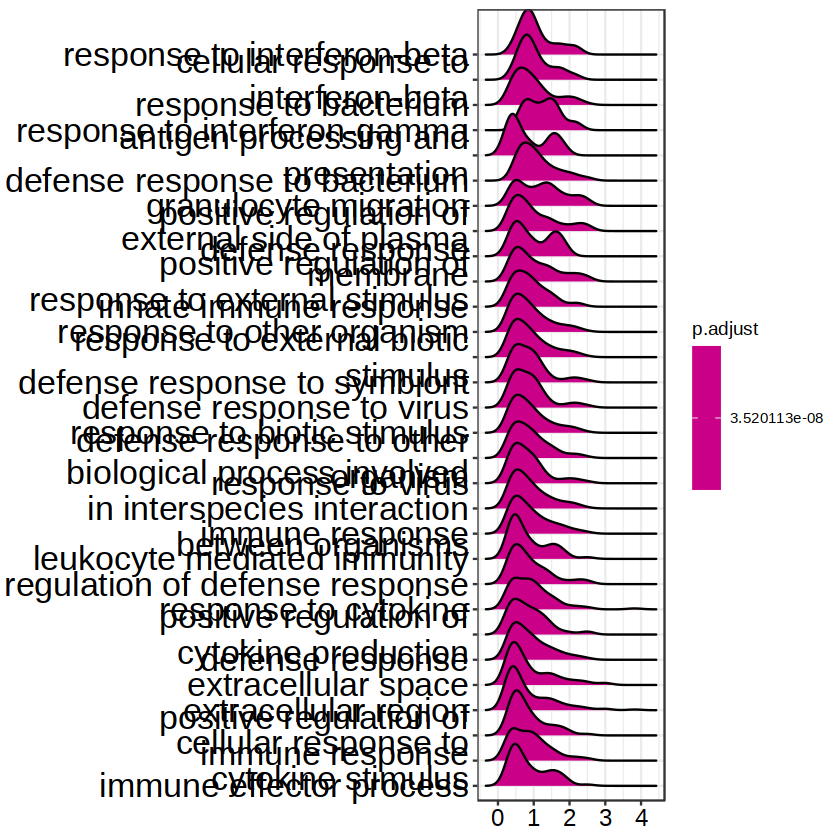

In [51]:
ridgeplot(gse)+theme(axis.text.y=element_text(size=20))

In [52]:
for (n in files){
    df <- read.csv(paste0("csv/de/", n, ".csv"))
    original_gene_list <- df$logFC
    names(original_gene_list) <- df$X
    gene_list<-na.omit(original_gene_list)
    gene_list = sort(gene_list, decreasing = TRUE)
    gse_curated<-GSEA(gene_list,
            TERM2GENE=select_df,
            minGSSize=5)
    write.csv(gse_curated[], paste0("csv/gsea/target_sets/", n, "_currated.csv"))
    ridgeplot(gse_curated, showCategory = 40)+theme(axis.text.y=element_text(size=20))
    
    ggsave(paste0("figs/gsea/target_sets/", n, "_gse_curated.png"), height=16, width=10)   
}

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

Picking joint bandwidth of 0.249

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...

Picking joint bandwidth of 0.289

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

Picking joint bandwidth of 0.195

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. 

In [90]:
df <- read.csv(paste0("EXCLUDE/", "rank_test", ".csv"))

In [91]:
gs=c("REACTOME_SUMOYLATION", 
                                                                                   "REACTOME_SUMOYLATION_OF_IMMUNE_RESPONSE_PROTEINS", 
                                                                                   "REACTOME_SUMOYLATION_OF_INTRACELLULAR_RECEPTORS",
                                                                                   "REACTOME_PROCESSING_AND_ACTIVATION_OF_SUMO",
                                                                                   "HALLMARK_INFLAMMATORY_RESPONSE",
                                                                                   "HALLMARK_INTERFERON_ALPHA_RESPONSE",
                                                                                   "HALLMARK_INTERFERON_GAMMA_RESPONSE",
                                                                                   "BIOCARTA_CD40_PATHWAY",
                                                                                   "WP_MACROPHAGE_MARKERS",
                                                                                   "GOBP_MACROPHAGE_ACTIVATION_INVOLVED_IN_IMMUNE_RESPONSE",
                                                                                   "GOBP_MACROPHAGE_CHEMOTAXIS",
                                                                                   "GOBP_MACROPHAGE_CYTOKINE_PRODUCTION",
                                                                                   "GOBP_MACROPHAGE_PROLIFERATION",
                                                                                   "GOBP_REGULATION_OF_MACROPHAGE_ACTIVATION",
                                                                                   "GOBP_REGULATION_OF_MACROPHAGE_APOPTOTIC_PROCESS",
                                                                                   "GOBP_REGULATION_OF_MACROPHAGE_CHEMOTAXIS",
                                                                                   "GOBP_REGULATION_OF_MACROPHAGE_PROLIFERATION",
                                                                                   'GOBP_NEGATIVE_REGULATION_OF_PROTEIN_SUMOYLATION',
                                                                                   'GOBP_POSITIVE_REGULATION_OF_PROTEIN_SUMOYLATION',
                                                                                   'REACTOME_FCGAMMA_RECEPTOR_FCGR_DEPENDENT_PHAGOCYTOSIS',
                                                                                   'BIOCARTA_IFNA_PATHWAY',
                                                                                   'BIOCARTA_IFNG_PATHWAY',
                                                                                   'BIOCARTA_MONOCYTE_PATHWAY',
                                                                                   'BIOCARTA_NFKB_PATHWAY',
                                                                                   'BIOCARTA_STAT3_PATHWAY',
                                                                                   'REACTOME_INTERFERON_ALPHA_BETA_SIGNALING',
                                                                                   'REACTOME_INTERFERON_GAMMA_SIGNALING',
                                                                                   'REACTOME_INTERFERON_SIGNALING',
                                                                                   'REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL',
                                                                                   'WP_TGF_BETA_SIGNALING_PATHWAY',
                                                                                   'WP_MACROPHAGE_MARKERS',
                                                                                   'REACTOME_REGULATION_OF_IFNA_IFNB_SIGNALING',
                                                                                   'REACTOME_REGULATION_OF_IFNG_SIGNALING',
                                                                                   'REACTOME_NITRIC_OXIDE_STIMULATES_GUANYLATE_CYCLASE',
                                                                                   'REACTOME_METABOLISM_OF_NITRIC_OXIDE_NOS3_ACTIVATION_AND_REGULATION',
                                                                                   'HALLMARK_TNFA_SIGNALING_VIA_NFKB'
                                                                                  )
length(gs)
select_df <-  msigdbr(species = "Mus musculus")  %>% dplyr::select(gs_name, gene_symbol) %>% subset(gs_name %in% gs)

[1] 36

gs_name,gene_symbol
<chr>,<chr>
BIOCARTA_CD40_PATHWAY,Cd40
BIOCARTA_CD40_PATHWAY,Cd40lg
BIOCARTA_CD40_PATHWAY,Chuk
BIOCARTA_CD40_PATHWAY,Dusp1
BIOCARTA_CD40_PATHWAY,Elp1
BIOCARTA_CD40_PATHWAY,Ikbkb
BIOCARTA_CD40_PATHWAY,Ikbkg
BIOCARTA_CD40_PATHWAY,Map3k1
BIOCARTA_CD40_PATHWAY,Map3k14


In [92]:
original_gene_list <- df$avg_log2FC
names(original_gene_list) <- df$X
gene_list<-na.omit(original_gene_list)
gene_list = sort(gene_list, decreasing = TRUE)

In [93]:
gse_curated<-GSEA(gene_list,
            TERM2GENE=select_df,
            minGSSize=5, pvalueCutoff = 1)

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...

